 # ESTADÍSTICA 2.  PRÁCTICA 8.
 ## Autor: Jesús Octavio Raboso.
 
Los enunciados del ejercicio aparecerán en negrita, cursiva y color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

<font color='blue'>***Escribe una función de R que reciba un vector de números x (la muestra), y genere una muestra bootstrap de ese vector.***</font>


**BOOTSTRAP.** Se trata de un método de remuestreo utilizado para aproximar características de la distribución en el muestreo de un estadístico. Es adecaudo cuando no se dispone de la distribución exacta. La idea es aproximar características poblacionales por las correspondientes de la distribución empírica de los datos observados. En el caso de observaciones independientes e identicamente distribuidas, esto puede ser realizado mediante remuestreo, realizando repetidamente **muestreo aleatorio con reemplazamiento del conjunto de datos original y mantieniendo el tamaño muestral.**

Si $\boldsymbol{x}=  (x_{1}, x_{2},...,x_{N})^{t}$ es una muestra independiente e identicamente distribuida de $F_{\theta}$ y $\hat{\theta} = T(\boldsymbol{x})$ es un estimador para $\theta$, tenemos que para $i = 1,2,...,M$:

* $\boldsymbol{x}_{i}^{b} = (x_{i1}, x_{i2},...,x_{iN})^{t}$ es una muestra bootstrap obtenida mediante muestreo con reemplazamiento de $\boldsymbol{x}=  (x_{1}, x_{2},...,x_{N})^{t}$.

* $\bar{\theta_{i}^{b}} = T(\boldsymbol{x}_{i}^{b})$ es el valor del estadístico en la muestra bootstrap.


Siendo $N$ el tamaño muetsral, permite un total de $N^{N}$ muestras de bootstrap.

In [1]:
bootstrap <- function(x){
    
    #
    # Function for random sampling with replacement. 
    # The set of observations is assumed to be from an independent
    # and identically distributed population, so bootstrapping
    # is implemented by constructing a number of resamples with replacement of 
    # the observed data and of equal size to the observed dataset.
    #
    # @description: Function for random sampling with replacement (bootstrap).
    #
    # @param x: float vector. Vector to perform bootstrapping on. Original observation.
    #
    # @return x_bootstrap: float vector: Result of bootstrapping input x
    #
    
    x_bootstrap <- sample(x, replace = T)
    return(x_bootstrap)
}

<font color='blue'>***Utilizando la función anterior, escribe una función que reciba un vector de números x (la muestra original) y un número natural N, y que genere una matrix que tenga N columnas, siendo cada una una de las muestras de bootstrap.***</font>

In [2]:
bootstrap_N <- function(x, N){
    
    #
    # Function for random sampling with replacement. 
    # The set of observations is assumed to be from an independent
    # and identically distributed population, so bootstrapping
    # is implemented by constructing a number of resamples with replacement of 
    # the observed data and of equal size to the observed dataset.
    # Generates N samples with replacement.
    #
    # @description: Function for random sampling with replacement.
    #
    # @param x: float vector. Vector to perform bootstrapping on.
    #
    # @return X_bootstrap: float matrix. Matrix with dimensions
    # length(x)xN where each column is a bootstrapped sample from input vector x.
    
    X_bootstrap <- replicate(N, bootstrap(x))
    return(X_bootstrap)
}

<font color='blue'>***Escribe una función de R que reciba un vector de números x (la muestra) y genere una matriz que contenta TODAS las muestras jacknife con el mismo formato del ejercicio anterior.***</font>

**JACKKNIFE.** Método de remuestreo empleado para estimar el sesgo y varianza de un estimador.  Todas las muestras jakkcnife posibles son tantas como el tamaño muestral original $N$ y cada una de ellas consiste en elimininar una observación de la muestra original, quedándose con una nueva muestra de tamaño $N-1$ en la que el resto de observaciones aparecen exactamente con frecuencia 1.

In [3]:
jackknife <- function(x){
    
    #
    # Function for random sampling without replacement. 
    # Restulting samples after jackknife resampling method are found by
    # sistematically leaving out each observation from the original dataset.
    #
    # @description functoin for jackknife resampling method. 
    #
    # @param x: float vector. Vector to perform jackknife on. Original observation.
    #
    # @return X_jackkniffe: float matrix. Result of applying jackkniffe method to x 
    #
    
    X_jackknife <- simplify2array(lapply(x, function(a) setdiff(x, a)))
    return(X_jackknife)                                     
}

<font color='blue'>***Utilizando las funciones anteriores considera la desviación estándar de la media muestral para una muestra de N=10000 que se distribuya como en el ejercicio 1 (gaussiana centrada en 1.70m y sigma=1.7). Compara la desviación estándar obtenida, con la obtenida con bootstrap.***</font>

<font color='red'>**Vamos a considerar un $\sigma$ distinto para que el problema tenga sentido. Nos saldría un 16% de personas con altura negativa (aprox). Se deduce de la rega Regla 68-95-99.7 https://es.wikipedia.org/wiki/Regla_68-95-99.7**</font>


Dada una variable aleatoria $X\sim N(\mu = 170, \sigma = 0.3)$, supongamos que desconocemos el parámetro media poblacional. 

Queremos estimar el parámetro desconocido $\theta$, que es la media poblacional y calcular la desviación típica de la media muestral. 

Consideremos la muestra original de tamaño $N$: 
$$\boldsymbol{x}=  (x_{1}, x_{2},...,x_{N})^{t}.$$

Consideremos (puesto que en el remuestreo jackknife obtendremos N submuestras) N submuestras resultantes del bootstrap:
$$\boldsymbol{x}_{i}^{b} = (x_{i1}, x_{i2},...,x_{iN})^{t}, \hspace{3mm} i=1,2,...,N.$$
para cada submuestra $\{\boldsymbol{x}_{i}^{b}\}_{i=1}^{N}$, consideramos el estimador media muestral $\{\bar{\theta_{i}^{b}}\}_{i=1}^{N}$: 
$$\bar{\theta_{i}^{b}} = \frac{1}{N}\sum_{j=1}^{N}x_{ij} \hspace{3mm} \text{para}\hspace{3mm} i=1,2,...,N.$$

A partir de estos $N$ estimadores media muestral $\{\bar{\theta_{i}^{b}}\}_{i=1}^{N}$, consideramos la media de los mismos:
$$ \hat{\theta^{b}} = \frac{1}{N}\sum_{i=1}^{N}\bar{\theta_{i}^{b}}.$$

Para calcular la varianza del estimador:
$$\frac{1}{N-1}\sum_{i=1}^{N}(\bar{\theta_{i}^{b}} - \hat{\theta^{b}})^{2}$$.

In [4]:
# Sample size
N <- 10000

# Population mean
population_mean <- 1.70

# Population standard deviation
population_sd <- 0.3

# Generate random sample
sample_heights <- rnorm(n = N, mean = population_mean, sd = population_sd)

In [5]:
# Bootstrapping for sample. 
# Generate M=N samples
M <- N
bootstrap_heights <- bootstrap_N(sample_heights, M)

In [6]:
# Mean for each column (mean for each sample)
bootstrap_heights_means <- apply(bootstrap_heights, 2, mean)

In [7]:
# Mean of sample means for bootstrap
mean_bootstrap_heights_means <- mean(bootstrap_heights_means)

In [8]:
# Calculate standard deviation for bootstrap
bootstrap_sd <- function(N, sample_means, mean_of_means){
    
    #
    # @description: Calculate standard deviation for bootstrapp resampling
    #
    # @param N: int. Samlpe size (We do not really need this param. Instead, we could
    # use length(aprox) or length(real)  but we already initialized a variable N so we
    # do not compute any lengths)
    # @param sample_means: float vector. Vector containing sample means.
    # @param mean_of_means: float. Mean of sample means
    #
    # @return: float. Standard deviation of sample means after bootstrap resampling
    #
    
    return(sqrt((1 / (N - 1)) * sum((sample_means - mean_of_means) ^ 2)))
}

**Podríamos haber usado la función `var` de R pero ya que tenemos que definir otra para jackknife...**

In [9]:
# Compute standard deviation
b_sd <- bootstrap_sd(N, bootstrap_heights_means, mean_bootstrap_heights_means)
print(paste("Standard deviation for bootstrap sample means: ", b_sd))

[1] "Standard deviation for bootstrap sample means:  0.00296640414934394"


<font color='blue'>***Repite el ejercicio anterior utilizando la técnica jackknife. ¿Cuál da mejor resultado?***</font>

De manera similar a la del bootstrap, para cada submuestra jackknife, calculamos el estimador media muestral:
$$ \bar{\theta_{i}}^{jackk} = \frac{1}{N-1}\sum_{j=1; j\neq i}^{N}x_{ij} \hspace{3mm} \text{para}\hspace{3mm} i=1,2,...,N. $$

Por tanto: 
$$ \hat{\theta}^{jackk} = \frac{1}{N}\sum_{i=1}^{N}\bar{\theta_{i}}^{jackk}.$$

Para calcular la varianza del estimador:
$$\frac{N}{N-1}\sum_{i=1}^{N}(\bar{\theta_{i}}^{jackk} - \hat{\theta}^{jackk})^{2}$$.

In [10]:
# Calculate standard deviation for jackknife
jackknife_sd <- function(N, sample_means, mean_of_means){
    
    #
    # @description: Calcuate standard deviation for jackknife resampling
    #
    # @param N: int. Samlpe size (We do not really need this param. Instead, we could
    # use length(aprox) or length(real)  but we already initilized a variable N so we
    # do not compute any lengths)
    # @param sample_means: float vector. Vector containing sample means.
    # @param mean_of_means: float. Mean of sample means
    #
    # @return: float. Standar deviation of sample means after jackknife resampling
    #
    
    return(sqrt((N / (N - 1)) * sum((sample_means - mean_of_means) ^ 2)))
}

In [11]:
# Jackknife for sample
jackknife_heights <- jackknife(sample_heights)

In [12]:
# Mean for each column (mean for each sample)
jackknife_heights_means <- apply(jackknife_heights, 2, mean)

In [13]:
# Mean of sample means for jackknife
mean_jackknife_heights_means <- mean(jackknife_heights_means)

In [14]:
# Compute standard deviation
j_sd <- jackknife_sd(N, jackknife_heights_means, mean_jackknife_heights_means)
print(paste("Standard deviation for jackknife sample means: ", j_sd))

[1] "Standard deviation for jackknife sample means:  0.00299712820751153"


Comparamos la desviación típica poblacional con la obtenida tras el remuestreo con  bootstrap y jackknife:

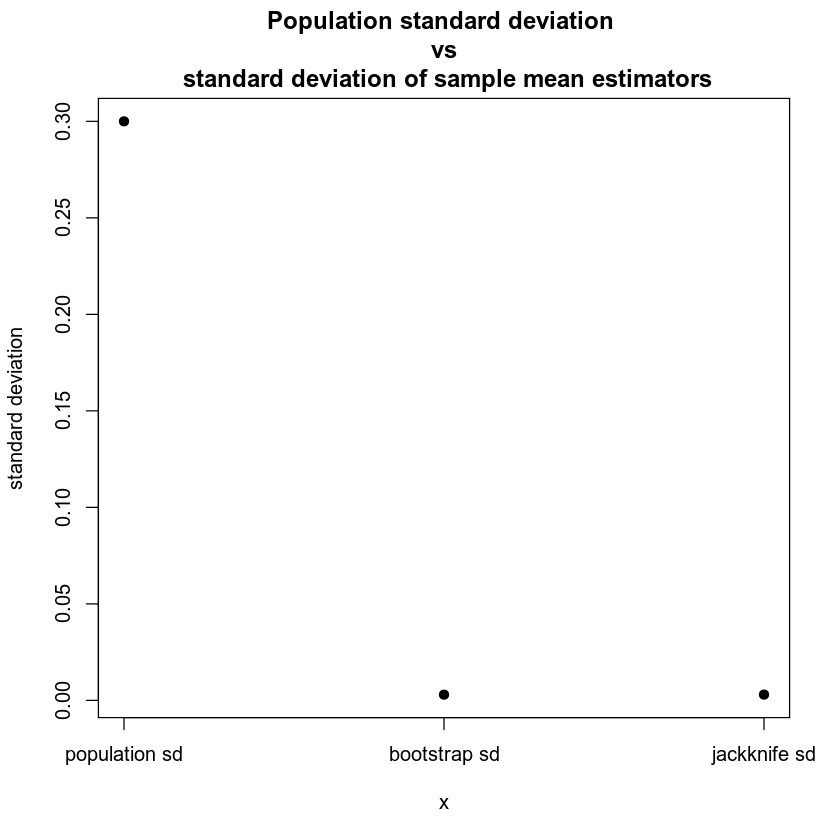

In [15]:
y <- c(population_sd, b_sd, j_sd)
x <- c(1,2,3)
labels <-  c('population sd', 'bootstrap sd', 'jackknife sd')


plot(x, y, pch = 19, 
     xaxt="n", 
     main = paste("Population standard deviation", '\n', 'vs', '\n', 'standard deviation of sample mean estimators'),
     ylab = "standard deviation")
axis(side = 1, at = x, labels = labels)

Obtenemos resultados similares a los vistos en el ejercicio 1. Como era de esperar, se aproximan a $$\frac{\sigma}{\sqrt{N}}$$ donde $\sigma$ es la desviación típia de la población y $N$ el tamaño muestral.